***Assignment1 :***   
*To build a CNN classifier in python using Keras API that could be used to classify handwritten digits of MNIST dataset and tune the model in such a way that after executing the code below,the test accuracy is more than 99.0*

##**[1]Import Libraries and modules**

In [1]:
# https://keras.io/

!pip install -q keras
import keras

Using TensorFlow backend.


*Why Keras?  
Its easier to use.It is a user-friendly high level DNN library framework running on top of Tensorflow/Theano/CNTK and helps in fast prototyping.Neural layers, cost functions, optimizers, initialization schemes, activation functions, and regularization schemes are all standalone modules that you can combine to create new models. New modules are simple to add, as new classes and functions.*

In [0]:
import numpy as np

import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist #https://keras.io/datasets/

*MNIST Dataset : The MNIST dataset contains 70000 28x28 grayscale images with 10 different classes(digits 0-9). Keras splits it in a training set with 60000 images and a testing set with 10000 images.*


##**[2.] Load pre-shuffled MNIST data into train and test sets**

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train shape:(60000, 28, 28)


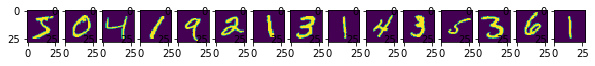

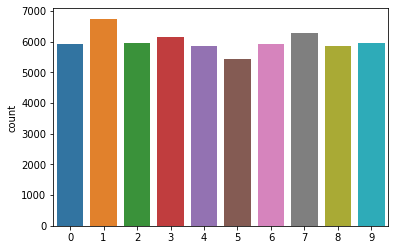

In [40]:
print ("X_train shape:{}".format(X_train.shape))
#plt.imshow(X_train[34095])

from matplotlib import pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,10))
x, y = 15, 1
for i in range(15):  
    plt.subplot(y, x, i+1)
    plt.imshow(X_train[i].reshape((28,28)),interpolation='nearest')
plt.show()

sns.countplot(y_train[:])


##**[3.]Preparing the Dataset**

In [0]:
#Reshaping the images data to a tensor of shape (num_samples, image_height, image_width, num_channels) i.e,including depth
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
#Scaling each of the images pixels to values between 0.0 and 1.0 
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices(one hot encoding)
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

##**[4.]Building the Network**
[https://keras.io/getting-started/sequential-model-guide/](https://)

[https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/](https://)

In [10]:
from keras.layers import Activation
model = Sequential()

#ORIGINAL NETWORK 
#model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
#model.add(Convolution2D(10, 1, activation='relu'))
#model.add(Convolution2D(10, 26))
#model.add(Flatten())
#model.add(Activation('softmax'))###

#MODIFIED NETWORK
model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1))) #>26x26x16 
model.add(Convolution2D(32, 3, 3, activation='relu')) #>24x24x32 
model.add(Convolution2D(64, 3, 3, activation='relu')) #>22x22x64 

model.add(MaxPooling2D(pool_size=(2, 2))) #>11x11x64
model.add(Convolution2D(16, 1, 1, activation='relu')) #>11x11x16

model.add(Convolution2D(32, 3, 3, activation='relu')) #>9x9x32 
model.add(Convolution2D(64, 3, 3, activation='relu')) #>7x7x64 
model.add(Convolution2D(128, 3, 3, activation='relu')) #>5x5x128 

model.add(Convolution2D(10, 1, activation='relu')) #>5x5x10
model.add(Convolution2D(10, 5))#>1x1x10
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (1, 1), activation="relu")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
/usr/local/lib/python3.6/

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 16)        1040      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 9, 9, 32)          4640      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 64)         

##**[5.]Compiling ,Fitting and Scoring the Model**

In [12]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

*batch size = the number of training examples in one forward+backward pass.  
-->The higher the batch size, the more memory space you'll need!!  
-->With a larger batch size, you might get more “accurate” gradients because now you are optimizing the loss simultaneously over a larger set of images*

*The loss function is a measure on how good our model is at achieving the given objective,in our case correct classification of input digit image*

*An optimizer is used to minimize the loss(objective) function by updating the weights through gradients.*

In [13]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=15, verbose=1)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/15





60000/60000 [==============================] - 21s 344us/step - loss: 0.1733 - acc: 0.9454
Epoch 2/15
60000/60000 [==============================] - 12s 206us/step - loss: 0.0575 - acc: 0.9829
Epoch 3/15
60000/60000 [==============================] - 12s 205us/step - loss: 0.0428 - acc: 0.9869
Epoch 4/15
60000/60000 [==============================] - 12s 206us/step - loss: 0.0347 - acc: 0.9892
Epoch 5/15
60000/60000 [==============================] - 12s 202us/step - loss: 0.0285 - acc: 0.9912
Epoch 6/15
60000/60000 [==============================] - 12s 202us/step - loss: 0.0241 - acc: 0.9923
Epoch 7/15
60000/60000 [==============================] - 12s 199us/step - loss: 0.0208 - acc: 0.9936
Epoch 8/15
60000/60000 [==============================] - 12s 198us/step - loss: 0.0185 - acc: 0.9941
Epoch 9/15
60000/60000 [==============================] - 12s 199us/step - loss: 0

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [15]:
print(score)

[0.03689879849365975, 0.9926]


In [0]:
y_pred = model.predict(X_test)

In [17]:
print(y_pred[:9])
print(y_test[:9])

[[4.72761572e-15 1.00348501e-15 6.09600695e-12 1.00944875e-09
  2.12210883e-16 1.05842021e-16 3.35183856e-26 1.00000000e+00
  1.52514784e-17 8.37461957e-12]
 [3.86523235e-12 3.18542503e-09 1.00000000e+00 1.37010654e-14
  8.05948641e-10 6.56088064e-18 1.07817553e-10 1.05543778e-14
  7.63053527e-15 1.61398176e-19]
 [4.46652021e-10 9.99992609e-01 3.37931384e-11 4.86532776e-12
  4.51257711e-06 4.87937735e-09 1.20519655e-06 1.64329458e-06
  1.23673904e-09 2.18040950e-11]
 [1.00000000e+00 3.74801075e-13 1.19978382e-13 6.15427077e-15
  1.65935633e-11 4.36527238e-11 1.96085856e-10 1.06397481e-15
  5.81811552e-12 9.84773166e-11]
 [4.04432623e-17 7.15783024e-14 2.22874833e-17 4.02081477e-20
  1.00000000e+00 6.97226615e-15 2.49972612e-12 8.45512417e-16
  1.40174646e-15 9.56787340e-12]
 [7.32602173e-11 9.99994636e-01 1.72468581e-10 3.30611433e-13
  2.78324865e-06 4.46286758e-10 2.77869873e-07 2.27722603e-06
  2.02986780e-10 6.02470070e-12]
 [4.34361308e-18 5.62315883e-09 7.64974089e-15 1.36631734e

##Visualizing the Filters of desired Conv Layers

In [45]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])
print (layer_dict)

{'conv2d_1': <keras.layers.convolutional.Conv2D object at 0x7ff09e75f048>, 'conv2d_2': <keras.layers.convolutional.Conv2D object at 0x7ff07e4c6438>, 'conv2d_3': <keras.layers.convolutional.Conv2D object at 0x7ff03e19c278>, 'max_pooling2d_1': <keras.layers.pooling.MaxPooling2D object at 0x7ff03e176128>, 'conv2d_4': <keras.layers.convolutional.Conv2D object at 0x7ff03e1c0160>, 'conv2d_5': <keras.layers.convolutional.Conv2D object at 0x7ff03e17ba58>, 'conv2d_6': <keras.layers.convolutional.Conv2D object at 0x7ff03e17be48>, 'conv2d_7': <keras.layers.convolutional.Conv2D object at 0x7ff03d9076d8>, 'conv2d_8': <keras.layers.convolutional.Conv2D object at 0x7ff03d914978>, 'conv2d_9': <keras.layers.convolutional.Conv2D object at 0x7ff03d91a9e8>, 'flatten_1': <keras.layers.core.Flatten object at 0x7ff03d928630>, 'activation_1': <keras.layers.core.Activation object at 0x7ff03d933a90>}


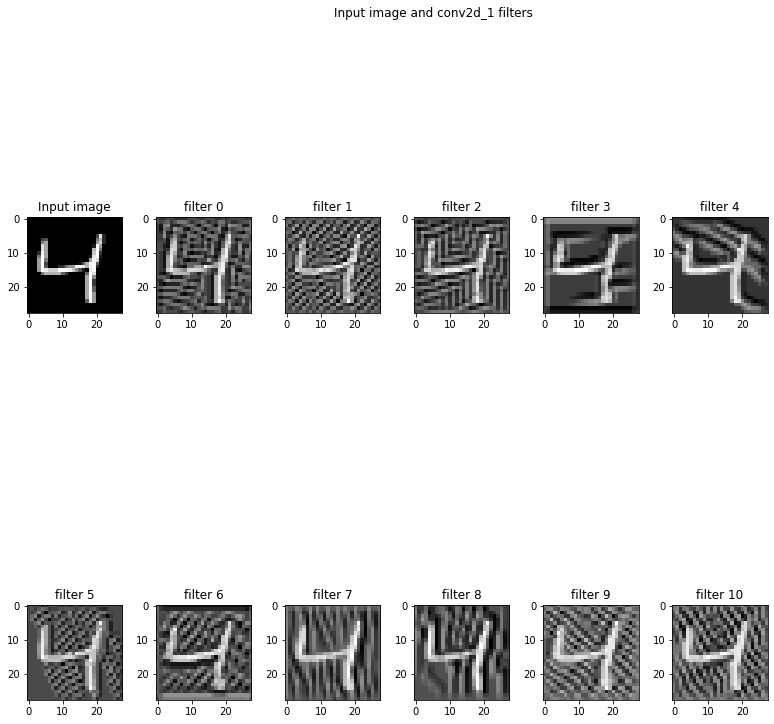

In [46]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_1'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()